In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [80]:
df = pd.read_excel('17-18.xlsx')
df.head()

,Неділя,Всього захворіло,у т.ч.діти до 17 років,18 - 29,30 - 64,65 та старші,Госпіталізація,Показник захворюваності,Епідпоріг,Перевищення епідпорогу (%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.0,7891.0,5836.0,639.0,1147.0,269.0,142.0,291.94,527.44,-44.65
2,42.0,6736.0,4928.0,517.0,1029.0,262.0,160.0,249.21,541.73,-54.00
3,43.0,6835.0,4392.0,796.0,1307.0,340.0,147.0,252.87,634.05,-60.12
4,44.0,7595.0,4965.0,870.0,1377.0,383.0,160.0,280.99,568.92,-50.61


In [81]:
df = df.iloc[1:]
dic = list(df.columns)
col_dict = dict(zip(dic, ['week', 'total','upto17', '18-29', '30-64', '65+', 'hospital', 'indicator', 'epid', 'epid excess']))
df2 = df.rename(columns = col_dict, inplace = False)
df2.head()

,week,total,upto17,18-29,30-64,65+,hospital,indicator,epid,epid excess
1,41.0,7891.0,5836.0,639.0,1147.0,269.0,142.0,291.94,527.44,-44.65
2,42.0,6736.0,4928.0,517.0,1029.0,262.0,160.0,249.21,541.73,-54.00
3,43.0,6835.0,4392.0,796.0,1307.0,340.0,147.0,252.87,634.05,-60.12
4,44.0,7595.0,4965.0,870.0,1377.0,383.0,160.0,280.99,568.92,-50.61
5,45.0,8209.0,5511.0,894.0,1448.0,356.0,168.0,303.70,572.42,-46.94


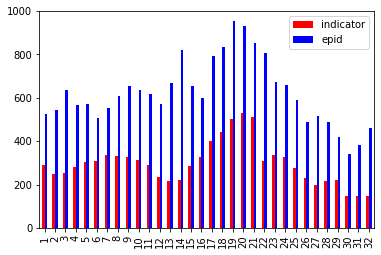

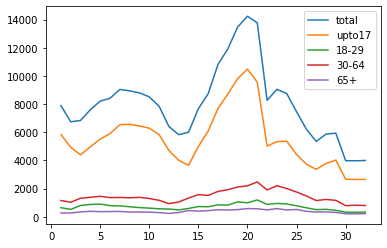

In [82]:
# df2.iloc[:, 1].plot(kind='bar', color='grey')
df2.iloc[:, 7:9].plot(kind='bar', color=['red', 'blue'])
df3 = df2.iloc[:, 1:6]
df3.plot()
# df2.iloc[:, 7].plot(kind='bar', color='black')


<Figure size 432x288 with 0 Axes>

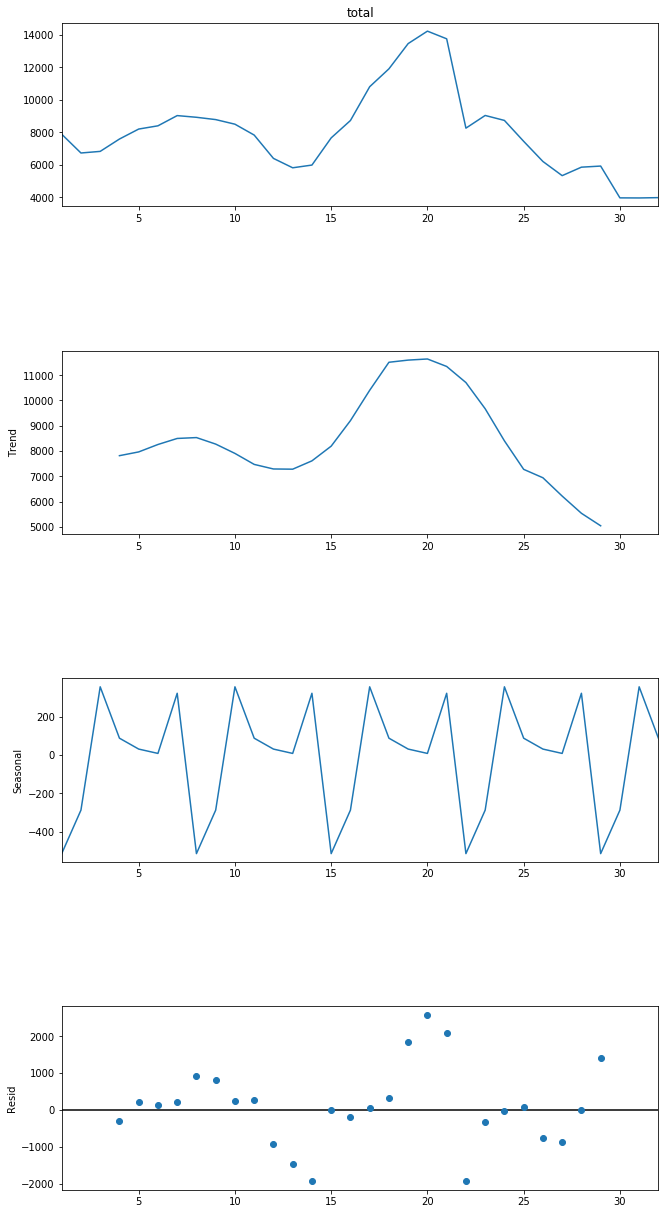

In [103]:
decomposition = seasonal_decompose(df2.total, period=7)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 20)

In [104]:
trend = decomposition.trend
seasonal = decomposition.seasonal
print(trend, seasonal, sep='\n')
# df2.resample('3T').sum()

1              NaN
2              NaN
3              NaN
4      7815.857143
5      7964.714286
6      8258.285714
7      8497.285714
8      8532.142857
9      8274.285714
10     7905.428571
11     7470.571429
12     7289.571429
13     7281.428571
14     7610.714286
15     8192.857143
16     9202.000000
17    10403.000000
18    11512.714286
19    11598.285714
20    11642.714286
21    11346.571429
22    10709.428571
23     9673.142857
24     8403.142857
25     7275.000000
26     6941.714286
27     6217.428571
28     5536.000000
29     5041.142857
30             NaN
31             NaN
32             NaN
Name: trend, dtype: float64
1    -514.544218
2    -287.794218
3     355.158163
4      87.312925
5      30.527211
6       7.884354
7     321.455782
8    -514.544218
9    -287.794218
10    355.158163
11     87.312925
12     30.527211
13      7.884354
14    321.455782
15   -514.544218
16   -287.794218
17    355.158163
18     87.312925
19     30.527211
20      7.884354
21    321.455782
22   -5